# Probabilistic inference


## Modelling a probabilistic problem using random distributions

Let us assume that the statistics has revealed that well prepared students got an average grade 4 from exam, and badly prepared students got average grade of 2. The standard deviation for both was about 1. Lets first create a statistical model of that using a library called [Pomegranade](https://pomegranate.readthedocs.io/en/latest/).

Since there were many students taking the course, let's model the distributions as normal. Let's create three different distributions: One for well prepared students: $\mathcal N(\mu=4, \sigma=1)$, one for not so well prepared students $\mathcal N(\mu=2, \sigma=1)$, and a so called mixture model, combining both, modelling all students.

In [1]:
import numpy as np
from numpy import mean , linspace
import matplotlib.pyplot as plt
import pomegranate as pg
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

well_prepared=pg.NormalDistribution(4,1)
badly_prepared=pg.NormalDistribution(2,1)

# Combined, all students
all_students = pg.GeneralMixtureModel([well_prepared, badly_prepared])

Let's now visualize the distributions to understand them better.

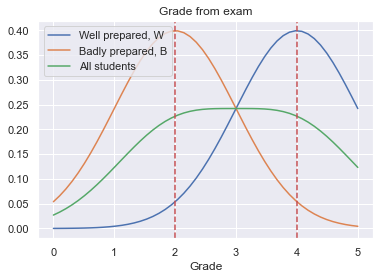

In [2]:
i=linspace(0,5)
plt.plot(i,well_prepared.probability(i), label='Well prepared, W')
plt.plot(i,badly_prepared.probability(i), label='Badly prepared, B')
plt.plot(i,all_students.probability(i), label='All students')
plt.xlabel('Grade')
plt.title('Grade from exam')
plt.legend()
plt.axvline(x=2, linestyle='--', color='r')
plt.axvline(x=4, linestyle='--', color='r')

### Using the model

The model created above can now be used for asking questions from it. For example such as:

1. What grade you will get, if you are well prepared or badly prepared, according to the current model? This is still easy, because when the normal distributions were created, the average value for well prepared was set to 4, and badly prepared as 2. These are also the most probable grade a student belonging to each class will get.
1. What is the probability of well prepared of getting grade 4, $P(4 | W)$? 
1. What is the probability of badly prepared of getting grade 4, $P(4 | B)$? 
1. What is the probability of getting grade 4 in general, $P(4)$?
1. If student got grade 4, what is the probability that he/she was well prepared $P(W | 4)$?
1. If student got grade 4, what is the probability that he/she was badly prepared $P(B | 4)$?

Let's use assumption that half of the students were well prepared and half were those with weaker preparations: $P(W) = P(B) = 0.5$.

The answer to the question 5-6 is given by Bayes Rule 

$$    P(W|4) = \frac{P(4|W)P(W)}{P(4)} $$


In [3]:
print("Check the question 1 by resampling the distribution")
print("  Mean grade for well prepared student is   %3.1f" % (mean(well_prepared.sample(100))))
print("  Mean grade for weakly prepared student is %3.1f" % (mean(badly_prepared.sample(100))))
print("")

print("Questions 2-4")
print("  Probability of well prepared of getting grade 4  P(4|W) = %d %%" % (well_prepared.probability(4)*100))
print("  Probability of badly prepared of getting grade 4 P(4|B) = %d %%" % (badly_prepared.probability(4)*100))
print("  Probability for all getting grade 4                P(4) = %d %%" % (all_students.probability([4])[0]*100))

print("")
pw=well_prepared.probability(4)*0.5/all_students.probability([4])[0]
print("  Probability that a student getting grade 4 is well prepared P(W|4) = %d %%" % (pw*100))

pb=badly_prepared.probability(4)*0.5/all_students.probability([4])[0]
print("  Probability that a student getting grade 4 is badly prepared P(B|4) = %d %%" % (pb*100))


Check the question 1 by resampling the distribution
  Mean grade for well prepared student is   4.0
  Mean grade for weakly prepared student is 1.8

Questions 2-4
  Probability of well prepared of getting grade 4  P(4|W) = 39 %
  Probability of badly prepared of getting grade 4 P(4|B) = 5 %
  Probability for all getting grade 4                P(4) = 22 %

  Probability that a student getting grade 4 is well prepared P(W|4) = 88 %
  Probability that a student getting grade 4 is badly prepared P(B|4) = 11 %


# Probabilistic classifier 

Can the students be classified to well prepared and badly prepared classes based on their grade?

Perhaps, but there are certainly students who perform well even though they have not prepared so well and vice versa. A probabilistic classifier can nicely capture these uncertainties. 

Bayesian classfier estimates the probabilities of a data vector $\bf{x}$ belonging in class $C_k$. It uses the Bayes theorem for making the prediction using the opposite condition probability, what is the probability that data  $\bf{x}$ was observed, when class $C_k$ is known?

$$    P(C_k|\mathbf{x}) = \frac{P(\mathbf{x}|C_k)P(C_k)}{P(\mathbf{x})} $$


The class $C_k$ is selected, whose probability is the highest. The actual probabilities can be used for estimating the reliability of the classifier. 

For example, when we calculated that $P(W|4) = 88\% > P(B|4) = 11 \%$, we can conclude that the student having grade 4 is probably well prepared.

These calculations are made by a Bayesian classifier, which can be created and used as follows:

The probabilities of classes badly prepared, well prepared are  [[0.11920292 0.88079708]]
The most probable class is  [1]


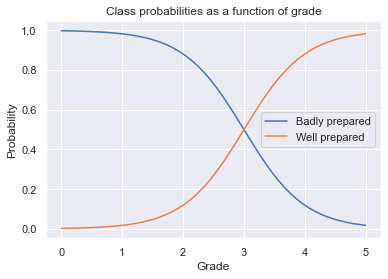

In [4]:
# Create Naibe Bayes classifier by describing two different classes 
# with normal distributions as priors
model = pg.NaiveBayes([badly_prepared, well_prepared])


# Predict the posterior probability of class memberships when 
# Grade=4 is observed
prob=model.predict_proba([4])

# Predict the most probable class if one gets grade 4
c=model.predict([4])

print("The probabilities of classes badly prepared, well prepared are ", prob )
print("The most probable class is ", c)

# Lets still plot the probabilities of class memberships over all grades
grades=np.reshape(linspace(0,5,50), newshape=(50,1))
proball=model.predict_proba(grades)
lines=plt.plot(grades, proball)
plt.xlabel('Grade')
plt.ylabel('Probability')
plt.title('Class probabilities as a function of grade')
plt.legend(['Badly prepared', 'Well prepared'])

### Multidimensional Bayesian classifier

Bayesian classifier can also easily work in multi-dimensional space.


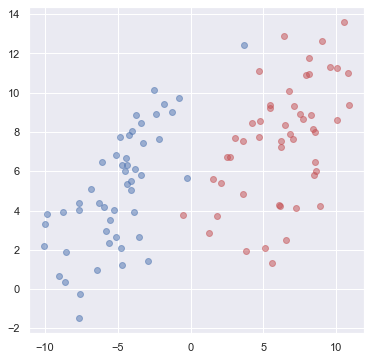

In [5]:
from sklearn.datasets import make_blobs, make_classification
import sklearn.datasets
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=2.5)
X[:,1] = X[:,1] + X[:,0]*0.6

plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b', alpha=0.5)
plt.show()

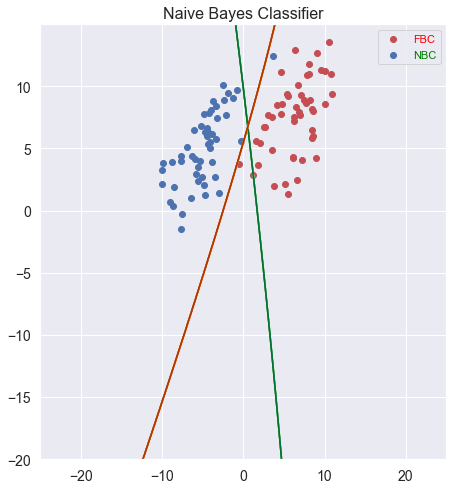

In [6]:
NBCmodel = pg.NaiveBayes.from_samples(pg.NormalDistribution, X, y)
BCmodel = pg.BayesClassifier.from_samples(pg.MultivariateGaussianDistribution, X, y)

xx, yy = np.meshgrid(np.arange(-25, 25, 0.02), np.arange(-20, 15, 0.02))
Z1 = NBCmodel.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z2 = BCmodel.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Naive Bayes Classifier", fontsize=16)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b')
plt.contour(xx, yy, Z1, cmap='Greens')
plt.contour(xx, yy, Z2, cmap='Oranges')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
plt.legend(['FBC', 'NBC'], labelcolor=['red', 'green'])


#### Not independed data
X = np.concatenate([np.random.normal(3, 2, size=(150, 2)), np.random.normal(7, 1, size=(250, 2))])
y = np.concatenate([np.zeros(150), np.ones(250)])


### Summary on Naive Bayesian classifiers

- The classifier is implemented by using random distributions and Bayes's rule
- The distributions can be also directly learned from data. Many frameworks which implement Naive Bayes have build in method for learning the data. See for example [NaiveBayes from Pomegranade](https://pomegranate.readthedocs.io/en/latest/NaiveBayes.html#initialization) or [NaiveBayes from ScikitLearn](https://scikit-learn.org/stable/modules/naive_bayes.html)
- Bayes classifier can also use other distributions than Normal, and more than one variable. For example, the estimation of student's prepareredness could be estimated from more than one observation, for example from the grade and work situation. 
- Naive Bayes is Naive in that sense that in multivariate case it assumes all marginal distributions being independent. Quite often it provides good estimates even being sligthly Naive. In one dimensional case the there is no difference with Naive bayesian or full Bayesian classifier.
- In multidimensional case, full Bayesian classifier can handle also diagonal distributions.


Read more about Bayesian Classifier from Pomegranade from [Naive Bayes and Bayes Classifiers](https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_5_Bayes_Classifiers.ipynb)

## Titanic survival data

![Painting of Titanic sinking](figures/Stower_Titanic.jpg)

> Painting of Titanic sinking by Willy Stöwer.

Let's study next the data describing the survivals from the Titanic accdent in 1912. The data set contains the following fields:

    PasengerId: integer
    pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
    Survived: 0 = No, 1 = Yes
    sibsp: # of siblings / spouses aboard the Titanic
    parch: # of parents / children aboard the Titanic
    ticket: Ticket number
    cabin: Cabin number
    embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

And some others

The question is, which observations would predict the survivability.

In [7]:
import pandas as pd

#train = pd.read_csv("data/titanic_train.csv").sample(400)
train = pd.read_csv("data/titanic_train.csv")
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Naive Bayes trial

In [9]:
#model = pg.NaiveBayes.from_samples(pg.NormalDistribution, X, y)
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score

#X=train.iloc[:,[2,4,5,6,7,9,10,11]]
X=train.iloc[:,[2,5,6,7,9]].copy()
X['Sex'] = (train.Sex=='female').astype('int')
y=train.iloc[:,1]
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0


In [10]:
model=CategoricalNB()
model.fit(X.fillna(method='pad'),y)

CategoricalNB()

In [11]:
accuracy_score(y_true=y, y_pred=model.predict(X.fillna(method='pad')))

0.8226711560044894

## Bayesian networks

Bayesian network is a graphical model 

In [12]:
#Xf=X.fillna(method='pad')
Xf=X.copy()
Xf['Age'] = round(train.fillna(method='pad').Age/20).astype('int')
Xf['Fare'] = round(train.fillna(method='pad').Fare/50).astype('int')
Xf.head()
Xf.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,1.463524,0.523008,0.381594,0.582492,0.352413
std,0.836071,0.802779,1.102743,0.806057,1.066701,0.477990
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,3.000000,4.000000,8.000000,6.000000,10.000000,1.000000


((4,), (0,), (3,), (5,), (5,), (), (0, 5))


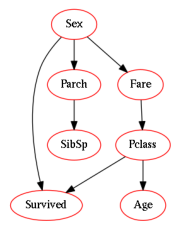

In [13]:
from pomegranate import BayesianNetwork

Data=Xf.copy()
Data['Survived']=y
model = BayesianNetwork.from_samples(Data, algorithm='exact', state_names=Data.columns)
print(model.structure)
model.plot()

In [14]:
# The model can be used for filling in missing values, such as survivability
inputData=Data.copy()

# Remove all info about survivability
inputData.Survived=None

print(inputData.head())
predictedData=model.predict(inputData.values)

   Pclass  Age  SibSp  Parch  Fare  Sex Survived
0       3    1      1      0     0    0     None
1       1    2      1      0     1    1     None
2       3    1      0      0     0    1     None
3       1    2      1      0     1    1     None
4       3    2      0      0     0    0     None


In [15]:
y_predicted=np.array(predictedData)[:,-1].astype('int')
accuracy_score(y_true=Data.Survived.values, y_pred=y_predicted)
#y_predicted
#Data.Survived.values*1

0.7867564534231201

In [16]:
model.marginal()

array([{
    "class" :"Distribution",
    "dtype" :"numpy.int64",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "1" :0.24242424242424337,
            "2" :0.20650953984287326,
            "3" :0.5510662177328833
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"numpy.int64",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.09539842873176214,
            "1" :0.4399551066217726,
            "2" :0.37822671156004484,
            "3" :0.0785634118967455,
            "4" :0.007856341189674744
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"numpy.int64",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.6823793490460144,
            "1" :0.2345679012345682,
            "2" :0.03142536475869831,
            "3" :0.017957351290684827,
            "4" :0.02020202020202041,
            "5" :0.0056116722783391



[Bayesian Network Structure Learning](https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4b_Bayesian_Network_Structure_Learning.ipynb)